<a href="https://colab.research.google.com/github/Fa-commits/BINA/blob/feature%2FChanges_BR/BINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ökonomische Auswirkungen von SBB-Immobilienprojekten auf Städte und Gemeinden

![Titelbild](/content/drive/MyDrive/ColabNotebooks/Titelbild.jpg)



---



# MSc Wirtschatsinformatik

**Business Intelligence & analysics** (BINA FS 2021)

Eingereicht am xx. Juni 2025 durch:

* Fabian Beutler, 3661 Uetendorf, fabian.beutler@students.bfh.ch
* Matteo Ciurlia, 4500 Solothurn, matteo.ciurlia@students.bfh.ch
* Björn Rindlisbacher, 3705 Faulensee, bjoern.rindlisbacher.2@students.bfh.ch
* Tim Zürcher, 3705 Faulensee, tim.zuercher@students.bfh.ch



---



# Inhaltsverzeichnis

>[Ökonomische Auswirkungen von SBB-Immobilienprojekten auf Städte und Gemeinden](#scrollTo=eGLjdDgnu2kU)

>>[MSc Wirtschatsinformatik](#scrollTo=hzQiX8g70MNU)

>[Inhaltsverzeichnis](#scrollTo=R_2Ky16MzPgb)

>[Pre-Requirements](#scrollTo=eeyOLg30fJV-)

>[Einleitung](#scrollTo=zlrICcRy3Ob5)

>[Ziele der Arbeit](#scrollTo=UFoTNLmv3TwF)

>[Datensammlung](#scrollTo=RG9Jh63y3YrO)

>>[Datenimport](#scrollTo=-Ub6attm3KGO)

>>>[Import des Datensatz 1](#scrollTo=vV1jHmeA55cJ)

>>>[Analyse des Datensat 1](#scrollTo=V1sDpR9G70pS)

>>[Berechnung der Differenzen](#scrollTo=_HS51JSROzLO)

>>[Erstellen der Schweizerkarte der Differenzent zwischen 2011 und 2022](#scrollTo=E7JQGTjc6esb)





---



# Pre-Requirements


In [11]:
import pandas as pd
import requests
import itertools
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, TwoSlopeNorm, LogNorm
import numpy as np
import seaborn as sns

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  Verbindung zum Google-Drive für Geojson-Datei. Muss jeder selbst verbinden.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Einleitung & Kontext

In einer zunehmend urbanisierten und vernetzten Gesellschaft gewinnen Infrastruktur- und Immobilienentwicklungen an strategischer Bedeutung für die wirtschaftliche Entwicklung von Städten und Gemeinden. Die Schweizerischen Bundesbahnen (SBB) leisten mit ihren Immobilienprojekten – insbesondere im Umfeld von Bahnhöfen – nicht nur Beiträge zur Verdichtung und zur funktionalen Transformation urbaner Räume, sondern könnten auch direkte und indirekte ökonomische Effekte auslösen.

Diese Arbeit untersucht, ob und inwiefern Investitionen der SBB in Immobilienprojekte mit einer positiven Entwicklung lokaler Wirtschaftsindikatoren verbunden sind. Im Zentrum steht die Frage, ob sich solche Projekte messbar auf die Anzahl der Arbeitsplätze, die Nachfrage nach Gewerbeflächen, Mietpreise, Steuereinnahmen sowie die Standortattraktivität für Unternehmen auswirken.

Vor dem Hintergrund kommunaler Planungshoheit und zunehmender wirtschaftlicher Konkurrenz unter Städten soll diese Arbeit datenbasierte Entscheidungsgrundlagen liefern. Im Fokus steht die quantitative Analyse von Gemeinden mit und ohne SBB-Projekt im Zeitraum 2011–2022. Ergänzt werden die Analysen durch eine geografische Visualisierung und explorative Vergleiche.

#2. Ziel und Informationsbedarf definieren

In einer urbanisierten Gesellschaft mit zunehmendem Druck auf Flächen, Mobilität und Infrastruktur gewinnen strategische Immobilieninvestitionen an Bedeutung. Die SBB realisiert in zahlreichen Städten und Gemeinden Immobilienprojekte im Umfeld von Bahnhöfen, die potenziell wirtschaftliche Veränderungen in den betroffenen Regionen auslösen. Dazu zählen neue Arbeitsplätze, veränderte Standortattraktivität, höhere Mietpreise sowie mögliche Verschiebungen in der Gewerbenutzung.

Ziel dieser Arbeit ist es, systematisch zu analysieren, ob solche SBB-Projekte messbare Auswirkungen auf die wirtschaftliche Entwicklung von Schweizer Gemeinden haben. Dabei soll nicht nur die absolute Veränderung der Beschäftigtenzahlen betrachtet werden, sondern auch die Wirkung auf spezifische Sektoren, Mietniveaus und Unternehmensdynamiken.

Folgende zentrale Schüsselfragen werden untersucht:

* Haben Gemeinden mit SBB-Projekten im Zeitraum 2011–2022 ein signifikant stärkeres Beschäftigungswachstum als vergleichbare Gemeinden ohne solche Projekte?

* Gibt es Anzeichen dafür, dass SBB-Investitionen die Standortattraktivität für Unternehmen erhöhen?

* Inwieweit verändern sich Mietpreise oder die Nachfrage nach Büro- und Gewerbeflächen in Projektgemeinden?

* Welche wirtschaftlichen Branchen profitieren besonders stark von den Immobilienprojekten?

* Können aus den analysierten Daten Empfehlungen für Gemeinden, Investoren oder die SBB selbst abgeleitet werden?

Um diese Fragen zu beantworten, wird ein datengestützter Analyseansatz verfolgt, der öffentlich zugängliche Quellen mit geografischen, statistischen und explorativen Methoden kombiniert. Die daraus gewonnenen Erkenntnisse sollen Gemeinden in ihrer Infrastruktur- und Standortentwicklung unterstützen.

#3. Datensammlung
Nachfolgend wird aufgezeigt, wie die für die Untersuchung benötigten Daten gesammelt und für die Auswertung überprüft, bereinigt und organisiert wurden.

##3.1 Datenquellen

Die Untersuchung basiert auf drei zentralen Datenquellen:

* Bundesamt für Statistik (BFS): Vollzeitäquivalente pro Gemeinde von 2011 bis 2022, differenziert nach Jahr und Wirtschaftssektor. Diese Daten wurden über die offizielle PX-Web API bezogen. [BFS - Arbeitsstätten und Beschäftigte nach Gemeinde und Wirtschaftssektor](https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken.assetdetail.32159099.html)

* SBB Open Data: Informationen zu aktuellen und geplanten Immobilienprojekten inklusive Ortsangabe, Baujahr und Projektstatus. Die Daten wurden als CSV-Datei von der Plattform data.sbb.ch bezogen und anschliessend bereinigt. [SBB - Immobilienprojekte](https://data.sbb.ch/explore/dataset/bauprojekte-immobilien/information)

* swissBOUNDARIES3D (Swisstopo): Geodaten aller Schweizer Gemeinden, bereitgestellt als GeoPackage. Diese wurden zur geografischen Visualisierung der Analyseergebnisse genutzt. [swissBOUNDARIES3D - administrativen Einheiten und Grenzen der Schweiz 2025](https://www.swisstopo.admin.ch/de/landschaftsmodell-swissboundaries3d)

* BFS Unternehmensstatistik: Neugründungen von Unternehmen pro Gemeinde und Jahr im sekundären und tertiären Sektor von 2013 bis 2022. Diese Daten wurden ebenfalls über die PX-Web API bezogen. [BFS - Unternehmensgründungen nach Gemeinde](https://www.bfs.admin.ch/bfs/de/home/statistiken/industrie-dienstleistungen/unternehmen-beschaeftigte/unternehmensdemografie/neugruendungen-ueberlebensraten.assetdetail.32846430.html)

##3.2 Datenqualität

Die BFS-Daten weisen eine konsistente Struktur über alle Jahre hinweg auf und enthalten flächendeckende Informationen für alle Gemeinden. Die SBB-Projektdaten mussten hinsichtlich Projektstatus, Baujahr und Ortsangabe gefiltert werden, da nicht alle Einträge verwertbare Informationen enthielten. Besonders relevant war die Prüfung des Projektbeginns (startofconstruction), um nur Projekte im Zeitraum 2011–2022 zu berücksichtigen.

Bei der Verwendung von Ortsnamen als Matching-Schlüssel ("Ort") zwischen SBB und BFS war eine Vereinheitlichung notwendig, da unterschiedliche Schreibweisen, Leerzeichen oder Gross-/Kleinschreibung zu Zuordnungsproblemen führten. Die GeoPackage-Datei enthielt zudem keine PLZ, weshalb die Zuordnung ausschliesslich über Ortsnamen erfolgte.

Der Datensatz zu Unternehmensgründungen war über den Zeitraum 2013 bis 2022 verfügbar und musste auf die Beobachtungseinheit "Unternehmensneugründungen" gefiltert werden. Die Werte wurden anschliessend nach Gemeinde und Jahr aggregiert. Die Datenstruktur war kompatibel mit den übrigen BFS-Daten, wobei wiederum eine Namensharmonisierung notwendig war.

##3.3 Datenbereinigung

Die SBB-Daten wurden auf die relevanten Attribute reduziert (Projektname, Stadt, PLZ, Phase, Portfolio, Baujahr) und anschliessend um fehlende Ortsnamen bereinigt. Der Zeitfilter auf Baujahre von 2011–2022 wurde angewendet. Die Ortsnamen wurden anschliessend in Kleinbuchstaben umgewandelt und von Leerzeichen bereinigt, um ein Matching mit dem BFS-Datensatz zu ermöglichen.

Die BFS-Daten wurden ebenfalls nach Ortsnamen bereinigt und über das Attribut "Gemeinde" in "PLZ" und "Ort" aufgeteilt. Die relevanten Beobachtungseinheiten (Vollzeitäquivalente) wurden numerisch konvertiert. Darüber hinaus wurde ein Differenzwert pro Gemeinde für die Jahre 2011 und 2022 gebildet.

Die Gründungsdaten wurden auf die Beobachtungseinheit "Unternehmensneugründungen" beschränkt und auf die Jahre 2013–2022 gefiltert. Anschliessend wurden die Daten aggregiert (Summenwert pro Gemeinde), vereinheitlicht (Gemeindename bereinigt) und mit der SBB-Projektinformation verknüpft.

##3.4 Datenmodellierung

Für die finale Analyse wurde eine Tabelle erstellt, die pro Gemeinde folgende Attribute enthält:

* Gemeindename (vereinheitlicht)

* PLZ

* Hat_SBB_Projekt (True/False)

* FTE 2011, FTE 2022

* Differenz der FTE

* Unternehmensgründungen (aggregiert 2013–2022)

* Geometrie (Polygon für Visualisierung)

Diese Tabelle bildet die Grundlage für die statistische Analyse (Boxplot, T-Test) sowie für die geografische Visualisierung. Die finalen Daten sind dadurch klar strukturiert, konsistent und analysierbar.

#4. Datenimport & Vorbereitung

##4.1 Bibliotheken laden

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colorbar as cbar
import requests
import itertools
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import ttest_ind

##4.2 Verbindung zu Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##4.3 Datensatz BFS: Beschäftigung nach Gemeinden

Dieser Datensatz stammt vom Bundesamt für Statistik (BFS) und enthält Informationen zur Anzahl
der Beschäftigten (Vollzeitäquivalente) in allen Schweizer Gemeinden, gegliedert nach Jahr,
Beobachtungseinheit und Wirtschaftssektor.

- **Zeitraum**: 2011 und 2022
- **Beobachtungseinheit**: Gemeinden
- **Wirtschaftssektor**: Gesamtheit aller Sektoren (Code „999“)
- **Indikator**: Anzahl Vollzeitäquivalente pro Gemeinde

Diese Daten dienen als Grundlage für die Analyse der wirtschaftlichen Entwicklung von Gemeinden
im Vergleich zwischen 2011 und 2022.


In [3]:
#Alle Beschäftigungsdaten von 2011-2022 aus BFS Statistik
def fetch_bfs_employment_data():
    url = "https://www.pxweb.bfs.admin.ch/api/v1/de/px-x-0602010000_102/px-x-0602010000_102.px"
    years = [str(y) for y in range(2011, 2023)]  # 2011–2022
    query = {
        "query": [
            {"code": "Jahr", "selection": {"filter": "item", "values": years}},
            {"code": "Wirtschaftssektor", "selection": {"filter": "item", "values": ["999"]}}, #999 steht für alle Sektoren
            {"code": "Beobachtungseinheit", "selection": {"filter": "item", "values": ["5"]}} #5 steht für Gemeindeebene
        ],
        "response": {"format": "json-stat2"}
    }
    response = requests.post(url, json=query)
    return response.json()

def process_bfs_data(raw_data):
    dimensions = ["Jahr", "Gemeinde", "Wirtschaftssektor", "Beobachtungseinheit"]
    df = pd.DataFrame(columns=dimensions + ["Wert"])
    sizes = [len(raw_data["dimension"][dim]["category"]["index"]) for dim in dimensions]

    def prod(iterable):
        result = 1
        for x in iterable:
            result *= x
        return result

    for combination in itertools.product(*[raw_data["dimension"][dim]["category"]["index"].keys() for dim in dimensions]):
        index = 0
        for i, val in enumerate(combination):
            dim_index = int(raw_data["dimension"][dimensions[i]]["category"]["index"][val])
            index += dim_index * prod(sizes[i+1:])
        value = raw_data["value"][index]
        row = dict(zip(dimensions, combination))
        row["Wert"] = value
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

    # Label-Mapping & Aufbereitung
    for dim in dimensions:
        df[dim] = df[dim].map(raw_data["dimension"][dim]["category"]["label"])
    df[['PLZ', 'Ort']] = df['Gemeinde'].str.split(' ', n=1, expand=True)
    df = df.drop(columns=['Gemeinde'])
    df.dropna(subset=['Ort'], inplace=True)
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    return df

# Abrufen und Aufbereiten
raw_bfs_data = fetch_bfs_employment_data()
df_bfs = process_bfs_data(raw_bfs_data)
print("BFS-Daten geladen:", df_bfs.shape)
print(df_bfs.head())

BFS-Daten geladen: (25740, 6)
   Jahr          Wirtschaftssektor  Beobachtungseinheit    Wert PLZ  \
1  2011  Wirtschaftssektor - Total  Vollzeitäquivalente   312.0   1   
2  2011  Wirtschaftssektor - Total  Vollzeitäquivalente  4414.0   2   
3  2011  Wirtschaftssektor - Total  Vollzeitäquivalente   618.0   3   
4  2011  Wirtschaftssektor - Total  Vollzeitäquivalente   682.0   4   
5  2011  Wirtschaftssektor - Total  Vollzeitäquivalente  1248.0   5   

                  Ort  
1     Aeugst am Albis  
2  Affoltern am Albis  
3          Bonstetten  
4     Hausen am Albis  
5            Hedingen  


##4.4 Datensatz SBB: Immobilienprojekte

Dieser Datensatz stammt von der SBB Open Data Plattform (data.sbb.ch) und enthält Informationen
zu aktuellen und geplanten Immobilienprojekten der SBB in der ganzen Schweiz.

- **Projekttypen**: STATIONS, INVESTMENT_OBJECTS etc.
- **Projektstatus**: in Planung, Bauphase, Management etc.
- **Attribute**: Projektname, Ort, Postleitzahl, Phase, Portfolio

Diese Daten erlauben es, Gemeinden mit aktiven SBB-Projekten zu identifizieren,
um deren wirtschaftliche Entwicklung gezielt zu untersuchen.


In [4]:
def load_sbb_projects_csv():
    url = "https://data.sbb.ch/explore/dataset/bauprojekte-immobilien/download/?format=csv"
    df_sbb = pd.read_csv(url, sep=';')
    df_sbb.columns = df_sbb.columns.str.strip().str.lower()

    # Nur Projekte mit Ortsangabe und Startjahr
    df_sbb = df_sbb.dropna(subset=['city', 'startofconstruction'])

    # Wandelt das Jahr (meist als string) in Integer um
    df_sbb['startofconstruction'] = pd.to_numeric(df_sbb['startofconstruction'], errors='coerce')

    # Filter: nur Projekte von 2011 bis 2022
    df_sbb = df_sbb[df_sbb['startofconstruction'].between(2011, 2022)]

    # Relevante Spalten extrahieren
    cols = ['titlede', 'city', 'zipcode', 'phase', 'portfolio', 'startofconstruction']
    df_sbb_reduced = df_sbb[cols].copy()

    # Aufbereitung
    df_sbb_reduced['city'] = df_sbb_reduced['city'].str.strip()
    df_sbb_reduced['zipcode'] = df_sbb_reduced['zipcode'].astype(str).str.strip()

    return df_sbb_reduced

# Aufruf der Funktion
df_sbb = load_sbb_projects_csv()

# Ausgabe: Anzahl gefilterter Projekte + Vorschau
print(f"Gefilterte SBB-Projekte (2011–2022): {df_sbb.shape[0]}")
print(df_sbb[['city', 'startofconstruction']].drop_duplicates().sort_values('startofconstruction'))



Gefilterte SBB-Projekte (2011–2022): 14
          city  startofconstruction
8       Morges               2017.0
69        Bern               2017.0
38     Liestal               2018.0
32       Basel               2019.0
57    Lausanne               2019.0
70      Zürich               2020.0
85       Cully               2020.0
22      Luzern               2020.0
35      Zürich               2021.0
50        Bern               2022.0
24      Luzern               2022.0
46      Prilly               2022.0
59  Winterthur               2022.0


##4.5 Datensatz BFS: Unternehmensgründungen nach Gemeinde
Dieser zusätzliche Datensatz des Bundesamts für Statistik ergänzt die Analyse um eine weitere ökonomische Kennzahl: die Anzahl Unternehmensneugründungen. Er enthält jährliche Angaben über die Anzahl neu gegründeter Unternehmen nach Gemeinde und Wirtschaftssektor.

* Zeitraum: 2013–2022

* Beobachtungseinheit: Unternehmensneugründungen (Code „2“)

* Wirtschaftssektoren: Sekundärer und tertiärer Sektor

* Indikator: Anzahl Neugründungen pro Gemeinde und Jahr

Die Daten wurden über die PX-Web API bezogen und in aggregierter Form (Summe über alle Jahre) mit den übrigen Gemeindeinformationen verknüpft. Sie erlauben Rückschlüsse auf die Standortattraktivität von Gemeinden – insbesondere im Vergleich zwischen solchen mit und ohne SBB-Projekt.

In [6]:
# 1. URL der PX-Web API (Gründungsdaten)
url = "https://www.pxweb.bfs.admin.ch/api/v1/de/px-x-0602030000_205/px-x-0602030000_205.px"

# 2. Query: Nur Neugründungen (Code "2"), alle Jahre, alle Gemeinden, Sek+Tert Sektor
query = {
    "query": [
        {"code": "Beobachtungseinheit", "selection": {"filter": "item", "values": ["2"]}},
        {"code": "Wirtschaftssektor", "selection": {"filter": "item", "values": ["2", "3"]}},
        {"code": "Jahr", "selection": {"filter": "item", "values": [str(y) for y in range(2013, 2023)]}}
    ],
    "response": {"format": "json-stat2"}
}

# 3. POST Request
response = requests.post(url, json=query)
raw_data = response.json()

# 4. Verarbeitung
dimensions = ["Jahr", "Gemeinde", "Wirtschaftssektor"]
df = pd.DataFrame(columns=dimensions + ["Wert"])
sizes = [len(raw_data["dimension"][dim]["category"]["index"]) for dim in dimensions]

def prod(iterable):
    result = 1
    for x in iterable:
        result *= x
    return result

for combo in itertools.product(*[raw_data["dimension"][dim]["category"]["index"].keys() for dim in dimensions]):
    index = 0
    for i, val in enumerate(combo):
        dim_index = int(raw_data["dimension"][dimensions[i]]["category"]["index"][val])
        index += dim_index * prod(sizes[i+1:])
    value = raw_data["value"][index]
    row = dict(zip(dimensions, combo))
    row["Wert"] = value
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

# Mapping
for dim in dimensions:
    df[dim] = df[dim].map(raw_data["dimension"][dim]["category"]["label"])

# Aggregation pro Gemeinde über alle Jahre (Sek+Tertär kombiniert)
df_gruendungen = df.groupby("Gemeinde", as_index=False)["Wert"].sum()
df_gruendungen = df_gruendungen.rename(columns={"Gemeinde": "Ort", "Wert": "Gruendungen_2013_2022"})

# Kontrolle
print("✅ Gründungsdaten geladen:", df_gruendungen.shape)
df_gruendungen.head()

✅ Gründungsdaten geladen: (2145, 2)


,Ort,Gruendungen_2013_2022
0,1 Aeugst am Albis,63
1,10 Obfelden,98
2,100 Stadel,58
3,1001 Doppleschwand,61
4,1002 Entlebuch,56


##4.5 Verknüpfung der Datensätze über PLZ
Nachfolgend werden die Datensätze verknüpft anhand der PLZ, so dass es jeweils die überinstimmende Gemeinde ist.

In [18]:
# Sicherstellen, dass alle Spalten Strings sind, bevor .str verwendet wird
df_bfs['Ort_clean'] = df_bfs['Ort'].astype(str).str.lower().str.strip()
df_sbb['city_clean'] = df_sbb['city'].astype(str).str.lower().str.strip()
df_gruendungen['Ort_clean'] = df_gruendungen['Ort'].astype(str).str.lower().str.strip()


# Städte mit SBB-Projekt identifizieren
projektorte = set(df_sbb['city_clean'].unique())
df_bfs['hat_sbb_projekt'] = df_bfs['Ort_clean'].apply(lambda ort: ort in projektorte)

# Unternehmensgründungsdaten mergen
df_bfs = df_bfs.merge(df_gruendungen[['Ort_clean', 'Gruendungen_2013_2022']], on='Ort_clean', how='left')

# 4. Ausgabe für Kontrolle
print("✅ Gemeinden mit SBB-Projekt (2011–2022):", df_bfs['hat_sbb_projekt'].sum())
print("📈 Unternehmensgründungsdaten ergänzt:", df_bfs['Gruendungen_2013_2022'].notna().sum(), "Gemeinden mit Werten")
print(df_bfs[df_bfs['hat_sbb_projekt'] == True][['Ort', 'Gruendungen_2013_2022']].drop_duplicates().sort_values('Ort'))


MergeError: Passing 'suffixes' which cause duplicate columns {'Gruendungen_2013_2022_x'} is not allowed.

#5 Daten analysieren

##5.1 Vergleich mit Boxplot
Mit Hilfe eines Boxplots wird das Beschäftigungswachstum (gemessen in Vollzeitäquivalenten) zwischen 2011 und 2022 visuell verglichen. Die Gemeinden werden dabei in zwei Gruppen unterteilt: mit SBB-Immobilienprojekt und ohne.
Diese grafische Darstellung erlaubt eine erste Einschätzung, ob SBB-Projekte mit einem höheren Beschäftigungszuwachs assoziiert sind.
Boxplots sind besonders geeignet, um zentrale Tendenzen (Median), Streuung sowie Ausreisser sichtbar zu machen.

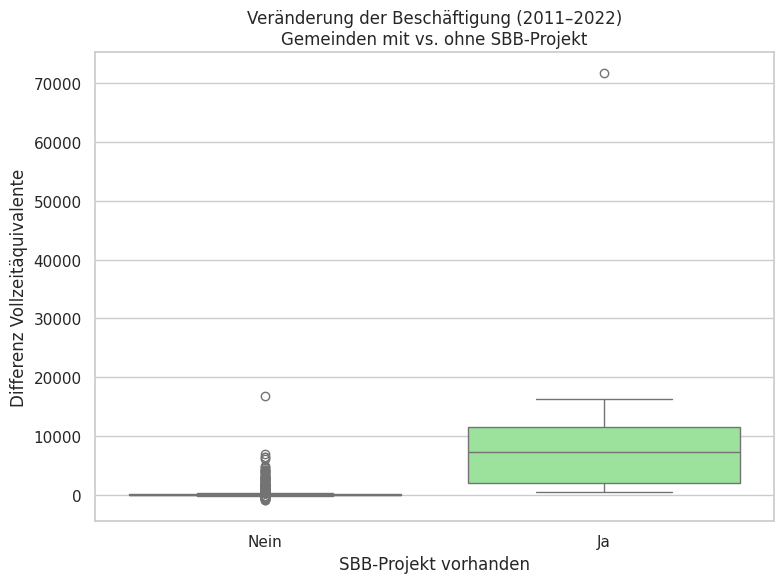

In [16]:
# Optional: Style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='hat_sbb_projekt',
    y='Differenz',
    hue='hat_sbb_projekt',
    data=df_growth.reset_index(),
    palette={True: "lightgreen", False: "lightblue"},
    legend=False
)

# Titel & Achsen
plt.title("Veränderung der Beschäftigung (2011–2022)\nGemeinden mit vs. ohne SBB-Projekt")
plt.xlabel("SBB-Projekt vorhanden")
plt.ylabel("Differenz Vollzeitäquivalente")
plt.xticks([0, 1], ['Nein', 'Ja'])
plt.tight_layout()
plt.show()


##5.2 Geografische Visualisierung der Beschäftigungsentwicklung mit Hervorhebung von SBB-Projektgemeinden in der Schweiz
Die nachfolgende Karte zeigt die geografische Verteilung der Veränderung der Beschäftigung (Vollzeitäquivalente) in allen Schweizer Gemeinden zwischen 2011 und 2022. Die FTE-Differenz wird farblich dargestellt: Grüntöne stehen für Beschäftigungszunahmen, Rottöne für Rückgänge. Gemeinden mit einem aktiven SBB-Immobilienprojekt im Zeitraum 2011–2022 werden zusätzlich schwarz umrandet hervorgehoben. Diese Darstellung dient dazu, regionale Muster zu erkennen und zu analysieren, ob SBB-Projekte mit auffälligen ökonomischen Entwicklungen korrelieren.

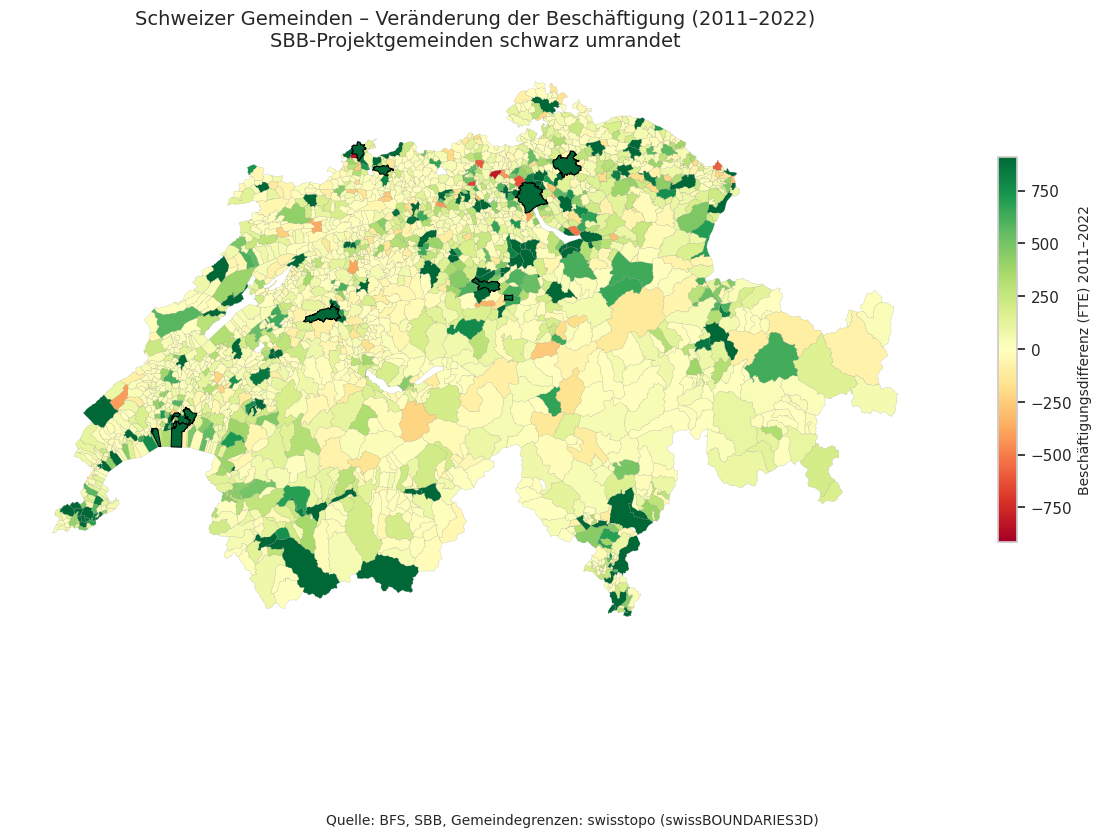

In [43]:
# 1. Geo-Daten laden
pfad = "/content/drive/MyDrive/Colab Notebooks/gemeindegrenzen_schweiz.gpkg"
gdf_geo = gpd.read_file(pfad, layer="tlm_hoheitsgebiet")

# 2. Ortsnamen in beiden Datensätzen vereinheitlichen
gdf_geo = gdf_geo.rename(columns={"name": "Ort"})
gdf_geo['Ort_clean'] = gdf_geo['Ort'].str.lower().str.strip()
df_bfs['Ort_clean'] = df_bfs['Ort'].str.lower().str.strip()

# 3. FTE-Differenz berechnen (2011–2022)
df_bfs_sub = df_bfs[df_bfs['Jahr'].isin(['2011', '2022'])]
df_diff = df_bfs_sub.pivot_table(index=['Ort_clean', 'hat_sbb_projekt'], columns='Jahr', values='Wert')
df_diff['Differenz'] = df_diff['2022'] - df_diff['2011']
df_diff = df_diff.reset_index()

# 4. Merge mit Geo-Daten über Ort_clean
gdf_merged = gdf_geo.merge(df_diff, on='Ort_clean', how='left')

# 5. Farbskala definieren (symmetrisch um 0)
vmin = np.percentile(gdf_merged['Differenz'].dropna(), 5)
vmax = np.percentile(gdf_merged['Differenz'].dropna(), 95)
abs_max = max(abs(vmin), abs(vmax))
norm = TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)

# 6. Plot erstellen
fig, ax = plt.subplots(figsize=(15, 10))
gdf_merged.plot(column='Differenz', cmap='RdYlGn', linewidth=0.1, edgecolor='grey', ax=ax, norm=norm)

# 7. Gemeinden mit SBB-Projekt schwarz umranden
gdf_merged[gdf_merged['hat_sbb_projekt'] == True].boundary.plot(ax=ax, color='black', linewidth=0.8)

# 8. Farbskala (Colorbar) hinzufügen
cmap = plt.cm.RdYlGn
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # nötig für ältere matplotlib-Versionen
cbar = fig.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label("Beschäftigungsdifferenz (FTE) 2011–2022", fontsize=10)

# 9. Stil & Ausgabe
ax.axis('off')
plt.title("Schweizer Gemeinden – Veränderung der Beschäftigung (2011–2022)\nSBB-Projektgemeinden schwarz umrandet", fontsize=14)
plt.figtext(0.5, 0.02, "Quelle: BFS, SBB, Gemeindegrenzen: swisstopo (swissBOUNDARIES3D)", ha='center', fontsize=10)
plt.show()

##5.3 T-Test zur Signifikanzprüfung des Beschäftigungswachstums zwischen Gruppen
Der T-Test prüft, ob der beobachtete Unterschied im durchschnittlichen Beschäftigungswachstum zwischen Gemeinden mit und ohne SBB-Projekt statistisch signifikant ist.

Hierbei kommt der Welch-T-Test zum Einsatz, welcher keine gleiche Varianz in den Gruppen voraussetzt.

Ein p-Wert unter 0.05 deutet darauf hin, dass der Unterschied nicht zufällig, sondern statistisch belastbar ist. Dies unterstützt die Hypothese, dass SBB-Projekte positive ökonomische Effekte auf Gemeinden haben können.

In [18]:
# Gruppen aufteilen
gruppe_mit = df_growth[df_growth.index.get_level_values('hat_sbb_projekt') == True]['Differenz']
gruppe_ohne = df_growth[df_growth.index.get_level_values('hat_sbb_projekt') == False]['Differenz']

# T-Test durchführen (ungleiches Varianzenmodell = Welch-Test)
t_stat, p_value = ttest_ind(gruppe_mit, gruppe_ohne, equal_var=False)

# Ergebnis ausgeben
print(f"T-Statistik: {t_stat:.3f}")
print(f"p-Wert: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Der Unterschied ist statistisch signifikant (p < 0.05).")
else:
    print("Kein signifikanter Unterschied nach klassischem Schwellenwert.")


T-Statistik: 1.874
p-Wert: 0.09786
Kein signifikanter Unterschied nach klassischem Schwellenwert.


### Import des Datensatzes
Inkl. erster kleiner Bereinigungen

In [ ]:
# Data source URL
url = "https://www.pxweb.bfs.admin.ch/api/v1/de/px-x-0602010000_102/px-x-0602010000_102.px"

# Function to retrieve the data for a specific combination of parameters
def fetch_data(years, wirtschaftssektoren, beobachtungseinheiten):
    query = {
        "query": [
            {
                "code": "Jahr",
                "selection": {
                    "filter": "item",
                    "values": years
                }
            },
            {
                "code": "Wirtschaftssektor",
                "selection": {
                    "filter": "item",
                    "values": wirtschaftssektoren
                }
            },
            {
                "code": "Beobachtungseinheit",
                "selection": {
                    "filter": "item",
                    "values": beobachtungseinheiten
                }
            }
        ],
        "response": {
            "format": "json-stat2"
        }
    }
    response = requests.post(url, json=query)
    return response.json()

# Parameters for the query
years = ["2011", "2022"]
wirtschaftssektoren = ["999"]
beobachtungseinheiten = ["5"]

# Fetch data
data = fetch_data(years, wirtschaftssektoren, beobachtungseinheiten)

# Create DataFrame
df = pd.DataFrame(columns=["Jahr", "Gemeinde", "Wirtschaftssektor", "Beobachtungseinheit", "Wert"])

# Auxiliary function for calculating the product of a list
def prod(iterable):
    result = 1
    for x in iterable:
        result *= x
    return result

# Extract data and insert it into DataFrame
dimensions = ["Jahr", "Gemeinde", "Wirtschaftssektor", "Beobachtungseinheit"]
df = pd.DataFrame(columns=dimensions + ["Wert"])

sizes = [len(data["dimension"][dim]["category"]["index"]) for dim in dimensions]

for combination in itertools.product(*[data["dimension"][dim]["category"]["index"].keys() for dim in dimensions]):
    index = 0
    for i, val in enumerate(combination):
        # Convert the string index to an integer
        dim_index = int(data["dimension"][dimensions[i]]["category"]["index"][val])
        index += dim_index * prod(sizes[i+1:])

    value = data["value"][index]

    row = dict(zip(dimensions, combination))
    row["Wert"] = value
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

# Replace the codes with their descriptions
for dim in dimensions:
    df[dim] = df[dim].map(data["dimension"][dim]["category"]["label"])

# Splitting the municipality column into postcode and city
df[['PLZ', 'Ort']] = df['Gemeinde'].str.split(' ', n=1, expand=True)

# Remove the original municipality column
df = df.drop(columns=['Gemeinde'])

# Delete all entries that have None or NaN in Location
df.dropna(subset=['Ort'], inplace=True)

# Show DataFrame
print(df)


      Jahr          Wirtschaftssektor  Beobachtungseinheit  Wert   PLZ  \
1     2011  Wirtschaftssektor - Total  Vollzeitäquivalente   312     1   
2     2011  Wirtschaftssektor - Total  Vollzeitäquivalente  4414     2   
3     2011  Wirtschaftssektor - Total  Vollzeitäquivalente   618     3   
4     2011  Wirtschaftssektor - Total  Vollzeitäquivalente   682     4   
5     2011  Wirtschaftssektor - Total  Vollzeitäquivalente  1248     5   
...    ...                        ...                  ...   ...   ...   
4287  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   230  6806   
4288  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   343  6807   
4289  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   513  6808   
4290  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   655  6809   
4291  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   302  6810   

                     Ort  
1        Aeugst am Albis  
2     Affoltern am Albis  
3             Bonstetten  
4  

In [ ]:
print(data)

{'class': 'dataset', 'label': 'Arbeitsstätten und Beschäftigte nach Jahr, Gemeinde, Wirtschaftssektor und Beobachtungseinheit', 'source': 'BFS - Statistik der Unternehmensstruktur - © BFS', 'updated': '2013-11-15T08:15:00Z', 'id': ['Jahr', 'Gemeinde', 'Wirtschaftssektor', 'Beobachtungseinheit'], 'size': [2, 2146, 1, 1], 'dimension': {'Jahr': {'extension': {'show': 'value'}, 'label': 'Jahr', 'category': {'index': {'2011': 0, '2022': 1}, 'label': {'2011': '2011', '2022': '2022'}}}, 'Gemeinde': {'extension': {'show': 'value'}, 'label': 'Gemeinde', 'category': {'index': {'99999': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '21': 15, '22': 16, '23': 17, '24': 18, '25': 19, '26': 20, '27': 21, '28': 22, '29': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '37': 30, '38': 31, '39': 32, '40': 33, '41': 34, '43': 35, '51': 36, '52': 37, '53': 38, '54': 39, '55': 40, '56': 41, '57': 42, '58': 43, '5

### Analyse des Datensat 1

In [ ]:
print(df.describe())

        Jahr          Wirtschaftssektor  Beobachtungseinheit  Wert   PLZ  \
count   4290                       4290                 4290  4287  4290   
unique     2                          1                    1  1935  2145   
top     2011  Wirtschaftssektor - Total  Vollzeitäquivalente    53     1   
freq    2145                       4290                 4290    17     2   

                    Ort  
count              4290  
unique             2145  
top     Aeugst am Albis  
freq                  2  


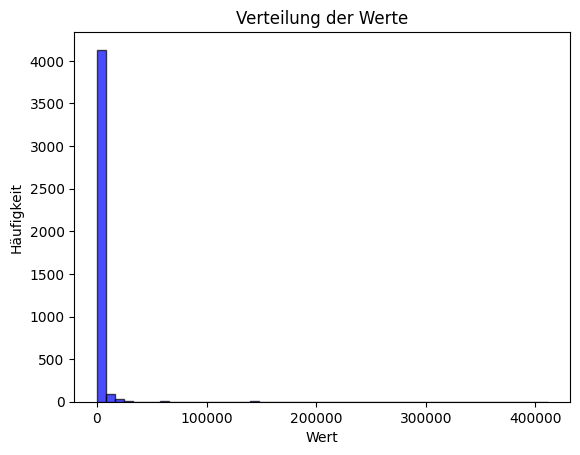

In [ ]:
df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')

plt.hist(df['Wert'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Verteilung der Werte')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

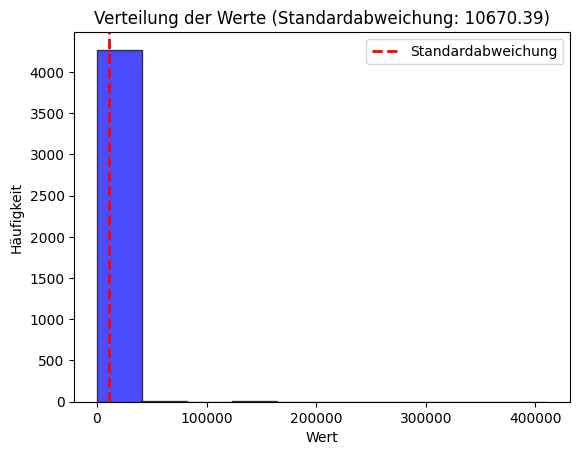

In [ ]:
# Calculate the standard deviation
standard_deviation = df['Wert'].std()

# Create the histogram
plt.hist(df['Wert'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Verteilung der Werte (Standardabweichung: {:.2f})'.format(standard_deviation))
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Add a vertical line to represent the standard deviation
plt.axvline(standard_deviation, color='red', linestyle='dashed', linewidth=2, label='Standardabweichung')

plt.legend()  # Show the legend for the standard deviation line
plt.show()

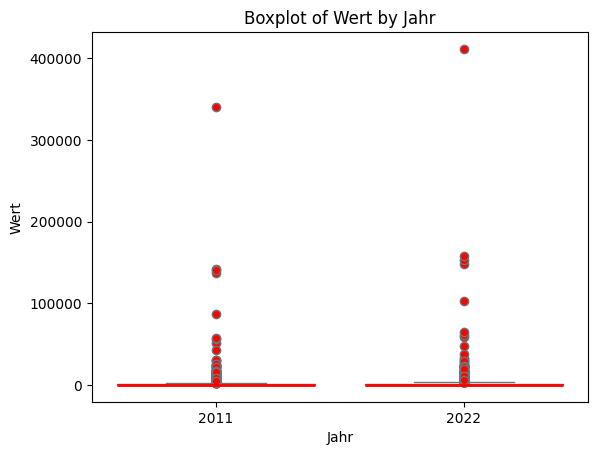

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Jahr', y='Wert', data=df, hue='Jahr',
            palette=['lightblue', 'lightgreen'],
            medianprops=dict(color='red', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6))


plt.title('Boxplot of Wert by Jahr')
plt.xlabel('Jahr')
plt.ylabel('Wert')

plt.show()

<Axes: xlabel='Wert', ylabel='Proportion'>

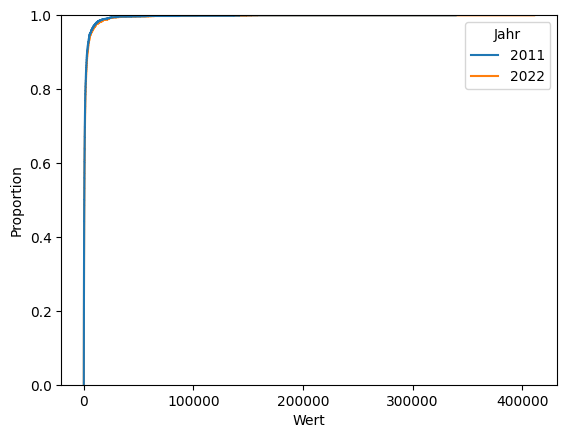

In [ ]:
sns.ecdfplot(data=df, x='Wert', hue='Jahr')


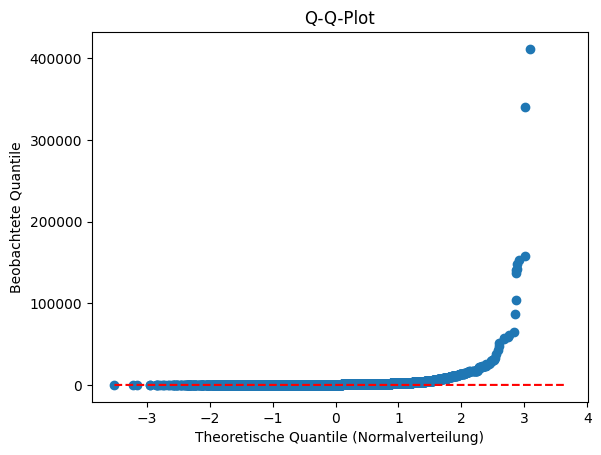

In [ ]:
from scipy import stats

data = df['Wert']

quantiles_data = np.sort(data)
quantiles_norm = np.sort(stats.norm.rvs(size=len(data)))

# Plotte den Q-Q-Plot
plt.scatter(quantiles_norm, quantiles_data)
plt.plot(quantiles_norm, quantiles_norm, 'r--')  # Referenzlinie
plt.title('Q-Q-Plot')
plt.xlabel('Theoretische Quantile (Normalverteilung)')
plt.ylabel('Beobachtete Quantile')
plt.show()

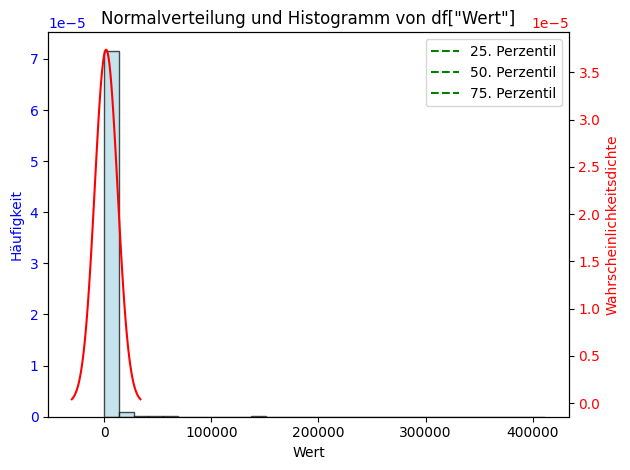

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extrahiere die Werte aus der Spalte df['Wert']
data = df['Wert']

# Berechne den Mittelwert und die Standardabweichung der Daten
mu = np.mean(data)
sigma = np.std(data)

# Erstelle den x-Bereich für die Verteilung
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Definiere die gewünschten Perzentile
percentiles = [25, 50, 75]  # Beispiel: 25., 50. und 75. Perzentil

# Berechne die Werte der Perzentile
percentile_values = np.percentile(data, percentiles)

# Erstelle den Plot
fig, ax1 = plt.subplots()

# Plotte das Histogramm auf der linken y-Achse
ax1.hist(data, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_xlabel('Wert')
ax1.set_ylabel('Häufigkeit', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Erstelle eine zweite y-Achse für die Normalverteilung
ax2 = ax1.twinx()

# Plotte die Normalverteilung auf der rechten y-Achse
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color='red', linestyle='-')
ax2.set_ylabel('Wahrscheinlichkeitsdichte', color='red')
ax2.tick_params('y', labelcolor='red')

# Plotte die Perzentile als vertikale Linien
for percentile, value in zip(percentiles, percentile_values):
    plt.axvline(x=value, color='green', linestyle='--', label=f'{percentile}. Perzentil')

plt.title('Normalverteilung und Histogramm von df["Wert"]')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
data = df['Wert']

data = df['Wert'].dropna()

print(df['Wert'].mean())
print(df['Wert'].median())
print(df['Wert'].mode())

# Berechne die Perzentile
percentile_5 = np.percentile(data, 5)
percentile_95 = np.percentile(data, 95)

# Gib die Perzentile aus
print(f"5. Perzentil: {percentile_5}")
print(f"95. Perzentil: {percentile_95}")

1891.343830184278
426.0
0    53.0
Name: Wert, dtype: float64
5. Perzentil: 36.0
95. Perzentil: 6149.4


## Berechnung der Differenzen

In [ ]:
# Calculating the difference between the years 2011 and 2022 based on the data frame df
df_2011_2022 = df[df['Jahr'].isin(['2011', '2022'])]

# Pivoting the DataFrame to have the years as columns
pivoted_df = df_2011_2022.pivot(index='PLZ', columns='Jahr', values='Wert')

 # Calculating the difference between 2022 and 2011
pivoted_df['Differenz'] = pivoted_df['2022'] - pivoted_df['2011']

print(pivoted_df)

Jahr  2011  2022 Differenz
PLZ                       
1      312   297       -15
10     931  1009        78
100    413   385       -28
1001   139   135        -4
1002  1153  1319       166
...    ...   ...       ...
990     40    61        21
991     73    73         0
992    947   811      -136
993     86    82        -4
995    881   998       117

[2145 rows x 3 columns]


## Erstellen der Schweizerkarte der Differenzent zwischen 2011 und 2022

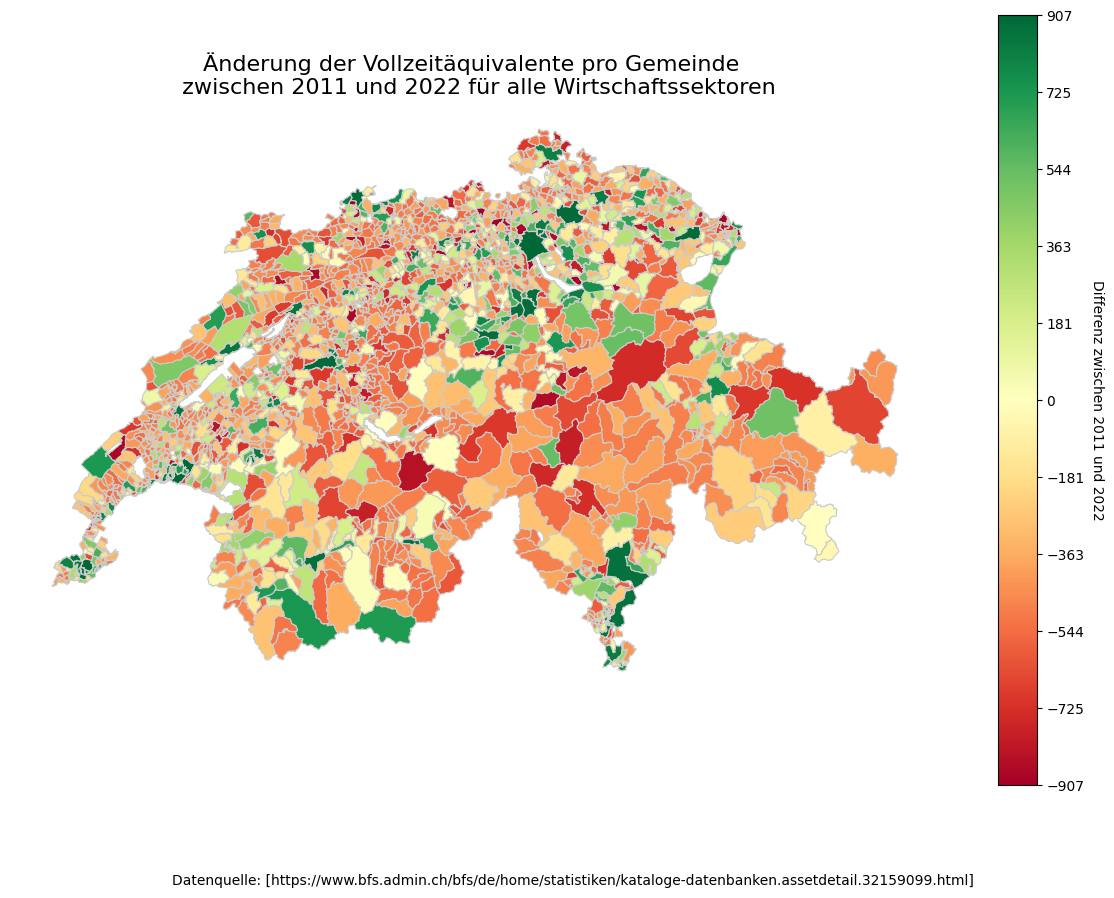

In [ ]:
# Load Switzerland's geographical data (GeoJSON file containing municipality boundaries)
switzerland = gpd.read_file('/content/drive/MyDrive/ColabNotebooks/gemeinden.geojson')

# Reset the index of pivoted_df to make 'PLZ' a column
pivoted_df = pivoted_df.reset_index()

# Convert the 'PLZ' column in the pivoted DataFrame to numeric type for merging
pivoted_df['PLZ'] = pd.to_numeric(pivoted_df['PLZ'])

# Merge the geographical data (switzerland) with the pivoted data (pivoted_df) based on municipality BFS number and PLZ
merged_data = switzerland.merge(pivoted_df, left_on='gemeinde.BFS_NUMMER', right_on='PLZ', how="left")

# Remove rows with missing values (NaN) from the merged dataset
merged_data = merged_data.dropna()

# Create a Matplotlib figure and axis for plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Calculate the 5th and 95th percentiles of the 'Differenz' column to limit extreme values
vmin = np.percentile(merged_data['Differenz'], 5)
vmax = np.percentile(merged_data['Differenz'], 95)

# Calculate the absolute maximum value to create a symmetric color scale around 0
abs_max = np.max(np.abs([vmin, vmax]))

# Set vmin and vmax to symmetric values around 0 for better visualization of positive and negative differences
vmin = -abs_max
vmax = abs_max

# Create a normalization function that centers the colormap at 0 (TwoSlopeNorm)
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Add a small constant (+1) to 'Differenz' values to avoid issues with LogNorm (logarithmic scaling requires >0 values)
merged_data['Differenz_abs'] = merged_data['Differenz'].abs() + 1

# Plot the map using GeoPandas with the 'Differenz' column determining the color scale
im = merged_data.plot(column='Differenz', cmap='RdYlGn', linewidth=0.8, edgecolor='0.8', ax=ax, legend=False)

# Remove axis labels for a cleaner map visualization
ax.axis('off')

# Add a title to the map with two lines for better readability
plt.title('Änderung der Vollzeitäquivalente pro Gemeinde \n zwischen 2011 und 2022 für alle Wirtschaftssektoren', fontsize=16)

# Add a data source note below the map for transparency and reproducibility
plt.figtext(0.5, 0.01, 'Datenquelle: [https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken.assetdetail.32159099.html]', ha='center', fontsize=10)

# Create a ScalarMappable object for the colorbar using the same colormap and normalization as the map
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])

# Define colorbar ticks (including 0 if not already present) for better interpretation of values
ticks = np.linspace(vmin, vmax, num=11)  # Generate 11 evenly spaced ticks between vmin and vmax
if 0 not in ticks:
    ticks = np.sort(np.append(ticks, 0))  # Ensure that 0 is included in the ticks

# Add a colorbar to the figure with custom ticks and label it appropriately
cbar = fig.colorbar(sm, ax=ax, ticks=ticks)
cbar.set_label('Differenz zwischen 2011 und 2022', rotation=-90, va="bottom")

# Display the final map visualization
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import folium

# Lade die geografischen Daten der Schweizer Gemeinden
switzerland = gpd.read_file('/content/drive/MyDrive/ColabNotebooks/gemeinden.geojson')

# Bereite die Daten vor (wie in deinem Code beschrieben)
pivoted_df = pivoted_df.reset_index()
pivoted_df['PLZ'] = pd.to_numeric(pivoted_df['PLZ'])
merged_data = switzerland.merge(pivoted_df, left_on='gemeinde.BFS_NUMMER', right_on='PLZ', how="left")
merged_data = merged_data.dropna()

# Berechne die 5th und 95th Percentile für die Farbskala
vmin = np.percentile(merged_data['Differenz'], 5)
vmax = np.percentile(merged_data['Differenz'], 95)
abs_max = np.max(np.abs([vmin, vmax]))
vmin = -abs_max
vmax = abs_max


In [ ]:
# Erstelle eine Folium-Karte
m = folium.Map(location=[46.8, 8.2], zoom_start=7, tiles="cartodbpositron")

# print(merged_data.__geo_interface__)

# Füge die GeoJSON-Daten zur Karte hinzu
# folium.GeoJson(
#     merged_data.__geo_interface__,
# ).add_to(m)

folium.Choropleth(
    geo_data=merged_data.__geo_interface__,
    name="choropleth",
    data=merged_data,
    columns=['gemeinde.BFS_NUMMER', "Differenz"],
    key_on="features.properties.gemeinde.BFS_NUMMER",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="FTE Diff 2011-2022",
).add_to(m)

# Füge eine Legende hinzu
folium.LayerControl().add_to(m)

# Speichere die Karte als HTML-Datei
# m.save("sbb_immobilienprojekte.html")


AttributeError: 'NoneType' object has no attribute 'get'

In [ ]:
m

In [ ]:
Textbeifmerk

#6. Diskussion der Ergebnisse

#7. Präsentation der Ergebnisse


#8. Fazit

#9. Schlusswort